In [780]:
!ls

CHA_activities_2016-2020.csv  manual_clustering.ipynb
CHA_activities_2016-2020.xlsx observations copy.csv
Internal EDA.ipynb            observations.csv
australianholidays.csv        observations.xlsx
cha_dfsg_images               test.xlsx
datathonEDA.twb               typical_hub.ipynb
diversity_infovis10.pdf       ~$observations.xlsx


In [781]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('max_columns', 180)
pd.set_option('max_rows', 10000)
pd.set_option('max_colwidth', 1000)

internal = pd.read_csv('CHA_activities_2016-2020.csv')
internal.head()

/Users/davsha/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,HubRandomID,Hub_ActivityID,ActivityDate,ProgrammeID,ChildParticipants,AdultParticipants,DSS_ClientParticipants,ReferralParticipants,EngagedCount,LastModifiedBy,LastModifiedDateTime,StartTime,EndTime,ExternalVolunteers,HubVolunteers,SchoolVolunteers,Status,LastModifiedBy.1,LastModifiedDateTime.1,IsActive,ProgrammeID.1,ProgrammeName,ProgrammeCategoryID,ShortName,ServiceTypeID,ProgrammeCategoryID.1,CategoryName,Status.1,StartDate,ShortName.1
0,0,15994,259,4/3/19,50,11,7,18,0,0,cha_admin,55:54.0,10:00:00,12:00:00,0,0,0,closed,unisuper\SheelaN,23:39.9,1,50,Playgroups and Early Years,1,Playgroups,4,1,Programmed Activities,C,1/1/10,PROG
1,1,15994,260,25/2/19,50,12,8,20,0,0,cha_admin,55:54.0,10:00:00,12:00:00,0,0,0,closed,unisuper\SheelaN,23:39.9,1,50,Playgroups and Early Years,1,Playgroups,4,1,Programmed Activities,C,1/1/10,PROG
2,2,15994,261,11/3/19,50,0,0,0,0,0,cha_admin,55:54.1,10:00:00,12:00:00,0,0,0,closed,unisuper\SheelaN,23:39.9,1,50,Playgroups and Early Years,1,Playgroups,4,1,Programmed Activities,C,1/1/10,PROG
3,3,15994,262,18/3/19,50,12,8,20,0,0,cha_admin,55:54.1,10:00:00,12:00:00,0,0,0,closed,unisuper\SheelaN,23:39.9,1,50,Playgroups and Early Years,1,Playgroups,4,1,Programmed Activities,C,1/1/10,PROG
4,4,15994,263,4/2/19,50,10,6,16,0,0,cha_admin,55:54.1,10:00:00,12:00:00,0,0,0,closed,unisuper\SheelaN,23:39.9,1,50,Playgroups and Early Years,1,Playgroups,4,1,Programmed Activities,C,1/1/10,PROG


In [782]:
# convert date to datetime
internal['activity_date'] = pd.to_datetime(internal['ActivityDate'], format='%d/%m/%y')
internal[['ActivityDate', 'activity_date']]

,ActivityDate,activity_date
0,4/3/19,2019-03-04
1,25/2/19,2019-02-25
2,11/3/19,2019-03-11
3,18/3/19,2019-03-18
4,4/2/19,2019-02-04
...,...,...
163145,14/11/19,2019-11-14
163146,5/12/19,2019-12-05
163147,12/12/19,2019-12-12
163148,19/12/19,2019-12-19


In [783]:
# keep useful columns
internal = internal[['HubRandomID', 'Hub_ActivityID', 'ActivityDate', 
          'activity_date',  'ProgrammeCategoryID', 'CategoryName', 'ProgrammeID', 'ProgrammeName', 'ChildParticipants', 'AdultParticipants']]

internal.head()

,HubRandomID,Hub_ActivityID,ActivityDate,activity_date,ProgrammeCategoryID,CategoryName,ProgrammeID,ProgrammeName,ChildParticipants,AdultParticipants
0,15994,259,4/3/19,2019-03-04,1,Programmed Activities,50,Playgroups and Early Years,11,7
1,15994,260,25/2/19,2019-02-25,1,Programmed Activities,50,Playgroups and Early Years,12,8
2,15994,261,11/3/19,2019-03-11,1,Programmed Activities,50,Playgroups and Early Years,0,0
3,15994,262,18/3/19,2019-03-18,1,Programmed Activities,50,Playgroups and Early Years,12,8
4,15994,263,4/2/19,2019-02-04,1,Programmed Activities,50,Playgroups and Early Years,10,6


# 1. The Typical Hub
## 1.1 How many months has a hub been running?

In [784]:
# get min and max activity date
duration = internal.pivot_table(values='activity_date', index = ['HubRandomID'], aggfunc=[min, max])
duration = duration.droplevel(0, axis=1)
duration.columns = ['min_date', 'max_date']
duration.head()


,min_date,max_date
HubRandomID,,
10011,2017-04-17,2019-12-09
10549,2017-07-10,2019-12-20
10813,2017-04-17,2019-12-17
10833,2016-01-27,2019-12-19
10884,2016-02-01,2019-12-04


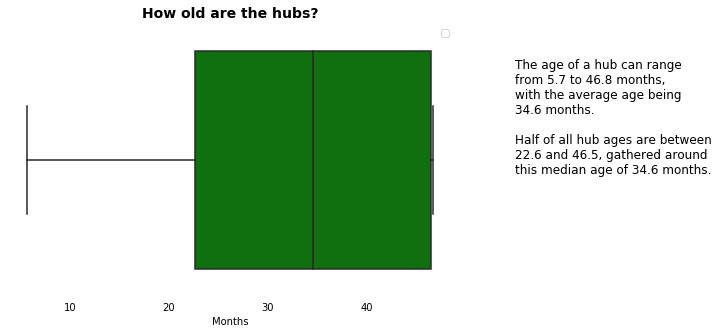

In [785]:
# calculate months a hub has been running
plt.figure(figsize=(8,5))

duration['months_running'] = duration['max_date'] - duration['min_date']
duration['months_running'] = duration['months_running'].astype('timedelta64[D]')/30.41


min_val = duration['months_running'].describe()[3]
q1 = duration['months_running'].describe()[4]
median = duration['months_running'].describe()[5]
q3 = duration['months_running'].describe()[6]
max_val = duration['months_running'].describe()[7]


sns.boxplot(duration['months_running'], color='g')

plt.tick_params(bottom=False, top=False, left=False, right=False)

for key, value in plt.gca().spines.items():
    value.set_visible(False)

    
plt.text(55, 0.05, 'The age of a hub can range\n\
from {:.1f} to {:.1f} months,\n\
with the average age being\n\
{:.1f} months. \n\n\
Half of all hub ages are between\n\
{:.1f} and {:.1f}, gathered around\n\
this median age of {:.1f} months.'.format(min_val, max_val, median, q1, q3, median),  fontsize = '12')
    
    
plt.xlabel('Months')
plt.title("How old are the hubs?", fontweight = 'bold', fontsize = '14')
plt.legend('')

plt.savefig('cha_dfsg_images/1_age.png',bbox_inches='tight',pad_inches=0)
plt.show()

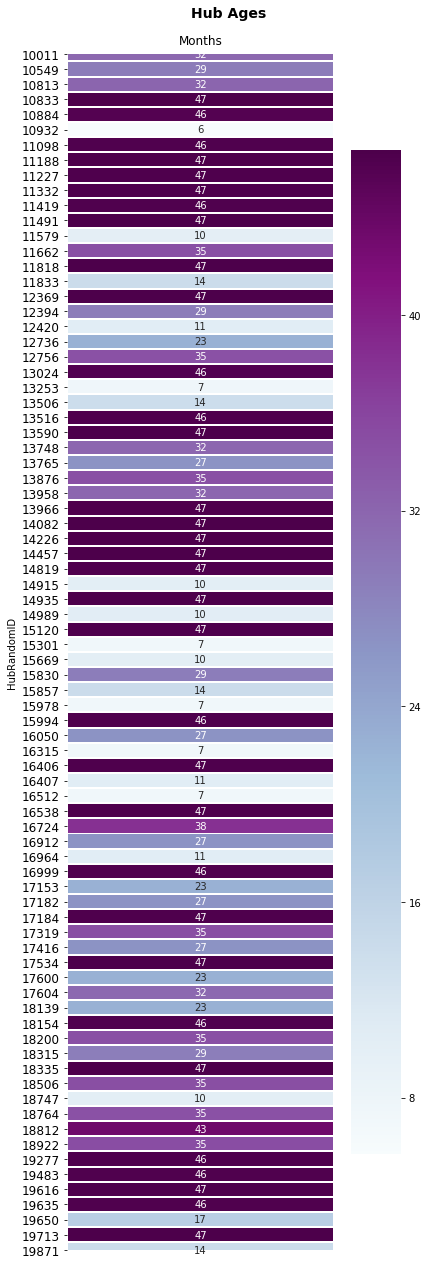

In [786]:
# plot heatmap of values

age_df = pd.DataFrame(duration['months_running'])
age_df.columns = ['Months']

fig = plt.figure(figsize=(6,22))
sns.heatmap(age_df, annot=True, fmt='.0f', linewidths=1, cmap='BuPu')
fig.suptitle('Hub Ages', y=.91, fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False,\
                bottom=False, top = False, labeltop=True)

# plt.text(1.3, 10, "We see no extreme outliers\n\
# in terms of hub age.", fontsize='12')

plt.savefig('cha_dfsg_images/2_ageheatmap.png',bbox_inches='tight',pad_inches=0)
plt.show()

## 1.2 Hub Activities per Month

In [787]:
# remove january - skews the data

not_jan_mask = internal['activity_date'].map(lambda x: x.month) != 1
df = internal[not_jan_mask].copy()

In [788]:
# check no month of January
pd.DatetimeIndex(df['activity_date']).month.unique()

Int64Index([3, 2, 4, 10, 11, 5, 6, 7, 12, 8, 9], dtype='int64', name='activity_date')

In [789]:
# keep only Programmed Activities and Education & Training
df = df[df['CategoryName'].isin(['Programmed Activities', 'Education and Training'])].copy()

In [790]:
# Split into year + month
dates = df['ActivityDate'].str.split('/', expand=True)
dates.columns = ['day', 'month', 'year']
df['yy-m'] = dates['year'] + '-' + dates['month'] 
df.head()


,HubRandomID,Hub_ActivityID,ActivityDate,activity_date,ProgrammeCategoryID,CategoryName,ProgrammeID,ProgrammeName,ChildParticipants,AdultParticipants,yy-m
0,15994,259,4/3/19,2019-03-04,1,Programmed Activities,50,Playgroups and Early Years,11,7,19-3
1,15994,260,25/2/19,2019-02-25,1,Programmed Activities,50,Playgroups and Early Years,12,8,19-2
2,15994,261,11/3/19,2019-03-11,1,Programmed Activities,50,Playgroups and Early Years,0,0,19-3
3,15994,262,18/3/19,2019-03-18,1,Programmed Activities,50,Playgroups and Early Years,12,8,19-3
4,15994,263,4/2/19,2019-02-04,1,Programmed Activities,50,Playgroups and Early Years,10,6,19-2


In [791]:
# get count of activies, and months, then activities per month
act_per_month = df.pivot_table(values=['Hub_ActivityID', 'yy-m'], index = ['HubRandomID'],\
                            aggfunc=lambda x: x.unique().shape[0])
act_per_month.columns = ['activity_count', 'active_month_count']

act_per_month['activities_per_active_month'] = (act_per_month['activity_count'] / act_per_month['active_month_count'])
act_per_month.head()


,activity_count,active_month_count,activities_per_active_month
HubRandomID,,,
10011,542,31,17.483871
10549,533,28,19.035714
10813,1201,31,38.741935
10833,2245,44,51.022727
10884,2624,44,59.636364


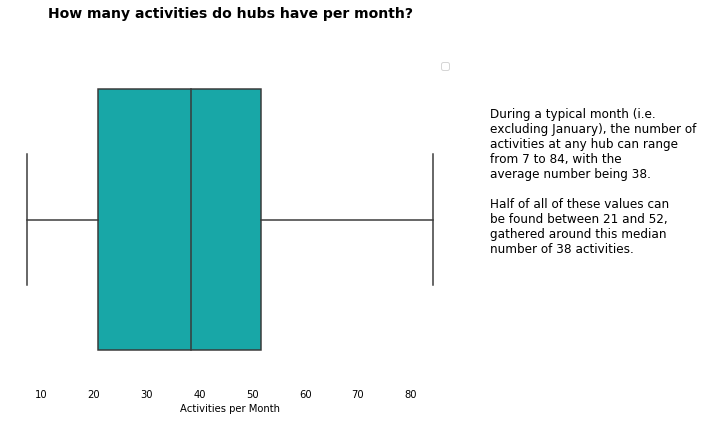

In [792]:
# plot

plt.figure(figsize=(8,6))

min_val = act_per_month['activities_per_active_month'].describe()[3]
q1 = act_per_month['activities_per_active_month'].describe()[4]
median = act_per_month['activities_per_active_month'].describe()[5]
q3 = act_per_month['activities_per_active_month'].describe()[6]
max_val = act_per_month['activities_per_active_month'].describe()[7]

sns.boxplot(act_per_month['activities_per_active_month'], color = 'c')


plt.tick_params(bottom=False, top=False, left=False, right=False)

for key, value in plt.gca().spines.items():
    value.set_visible(False)

plt.xlabel('Activities per Month')
plt.title("How many activities do hubs have per month?", fontweight = 'bold', fontsize = '14', y=1.1)


plt.legend('')


plt.text(95, 0.1, 'During a typical month (i.e.\n\
excluding January), the number of\n\
activities at any hub can range\n\
from {:.0f} to {:.0f}, with the\n\
average number being {:.0f}. \n\n\
Half of all of these values can\n\
be found between {:.0f} and {:.0f},\n\
gathered around this median\n\
number of {:.0f} activities.'.format(min_val, max_val, median, q1, q3, median),  fontsize = '12')

plt.savefig('cha_dfsg_images/3_activities.png',bbox_inches='tight',pad_inches=0)
plt.show()


In [793]:
# Building our dataset

observations = pd.merge(left=duration, right=act_per_month, how='left', on='HubRandomID')
observations.head()

,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month
HubRandomID,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364


## 1.3 Activity Audience - Children only, Adults only or Family (both children and adults)

In [794]:
# are activities for children or adults or both?

df['child_activity'] = df['ChildParticipants'].apply(lambda x: x > 0)
df['adult_activity'] = df['AdultParticipants'].apply(lambda x: x > 0)
df['family_activity'] = (df['child_activity']) & (df['adult_activity'])
df['child_only_activity'] = (df['child_activity']) & (~df['adult_activity'])
df['adult_only_activity'] = (df['adult_activity']) & (~df['child_activity'])
df['no_child_adult_attendees'] = (~df['child_activity']) & (~df['adult_activity'])
df.head(50)

,HubRandomID,Hub_ActivityID,ActivityDate,activity_date,ProgrammeCategoryID,CategoryName,ProgrammeID,ProgrammeName,ChildParticipants,AdultParticipants,yy-m,child_activity,adult_activity,family_activity,child_only_activity,adult_only_activity,no_child_adult_attendees
0,15994,259,4/3/19,2019-03-04,1,Programmed Activities,50,Playgroups and Early Years,11,7,19-3,True,True,True,False,False,False
1,15994,260,25/2/19,2019-02-25,1,Programmed Activities,50,Playgroups and Early Years,12,8,19-2,True,True,True,False,False,False
2,15994,261,11/3/19,2019-03-11,1,Programmed Activities,50,Playgroups and Early Years,0,0,19-3,False,False,False,False,False,True
3,15994,262,18/3/19,2019-03-18,1,Programmed Activities,50,Playgroups and Early Years,12,8,19-3,True,True,True,False,False,False
4,15994,263,4/2/19,2019-02-04,1,Programmed Activities,50,Playgroups and Early Years,10,6,19-2,True,True,True,False,False,False
5,15994,264,18/2/19,2019-02-18,1,Programmed Activities,50,Playgroups and Early Years,11,7,19-2,True,True,True,False,False,False
6,15994,265,25/3/19,2019-03-25,1,Programmed Activities,50,Playgroups and Early Years,13,9,19-3,True,True,True,False,False,False
7,15994,266,11/2/19,2019-02-11,1,Programmed Activities,50,Playgroups and Early Years,10,6,19-2,True,True,True,False,False,False
8,15994,269,11/2/19,2019-02-11,1,Programmed Activities,47,English Classes & Conversation Programs,0,6,19-2,False,True,False,False,True,False
9,15994,270,4/3/19,2019-03-04,1,Programmed Activities,47,English Classes & Conversation Programs,0,7,19-3,False,True,False,False,True,False


In [795]:
# group type of activity by hub

act_type = df.pivot_table(values=['child_only_activity', 'adult_only_activity', 'family_activity', 'no_child_adult_attendees'],\
                      index = ['HubRandomID'], aggfunc=[sum])
act_type = act_type.droplevel(0, axis=1)
act_type.columns = ['adult_only_activity_count', 'child_only_activity_count', 'family_activity_count', 'no_child_adult_attendees_count']

act_type.head()

,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count
HubRandomID,,,,
10011,147.0,1.0,146.0,248.0
10549,33.0,0.0,313.0,187.0
10813,59.0,105.0,458.0,579.0
10833,129.0,44.0,1240.0,832.0
10884,657.0,38.0,614.0,1315.0


In [796]:
# merge to continue building our dataset
observations = pd.merge(left=observations, right=act_type, how='left', on='HubRandomID')
observations.head()

,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count
HubRandomID,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714,33.0,0.0,313.0,187.0
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0


In [797]:
# child/adult/family activities per month at a hub level

observations['adult_only_activities_per_month'] = observations['adult_only_activity_count'] / observations['active_month_count']
observations['child_only_activity_per_month'] = observations['child_only_activity_count'] / observations['active_month_count']
observations['familty_activities_per_month'] = observations['family_activity_count'] / observations['active_month_count']
observations['no_child_adult_activities_per_month'] = observations['no_child_adult_attendees_count'] / observations['active_month_count']
observations.head()


,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count,adult_only_activities_per_month,child_only_activity_per_month,familty_activities_per_month,no_child_adult_activities_per_month
HubRandomID,,,,,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0,4.741935,0.032258,4.709677,8.000000
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714,33.0,0.0,313.0,187.0,1.178571,0.000000,11.178571,6.678571
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0,1.903226,3.387097,14.774194,18.677419
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0,2.931818,1.000000,28.181818,18.909091
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0,14.931818,0.863636,13.954545,29.886364


In [798]:
act_type_per_month =  observations[['child_only_activity_per_month', 'adult_only_activities_per_month', 
                                    'familty_activities_per_month', 'no_child_adult_activities_per_month']].stack().reset_index()

act_type_per_month.columns = ['HubRandomID', 'activity_audience', 'activities_per_month']
act_type_per_month['activity_audience'] = act_type_per_month['activity_audience'].str.replace('adult_only_activities_per_month', 'Adult-Only Activities')
act_type_per_month['activity_audience'] = act_type_per_month['activity_audience'].str.replace('child_only_activity_per_month', 'Children-Only Activities')
act_type_per_month['activity_audience'] = act_type_per_month['activity_audience'].str.replace('familty_activities_per_month', 'Mixed Activities')
act_type_per_month['activity_audience'] = act_type_per_month['activity_audience'].str.replace('no_child_adult_activities_per_month', 'No Children/Adults')
act_type_per_month.head()

,HubRandomID,activity_audience,activities_per_month
0,10011,Children-Only Activities,0.032258
1,10011,Adult-Only Activities,4.741935
2,10011,Mixed Activities,4.709677
3,10011,No Children/Adults,8.000000
4,10549,Children-Only Activities,0.000000


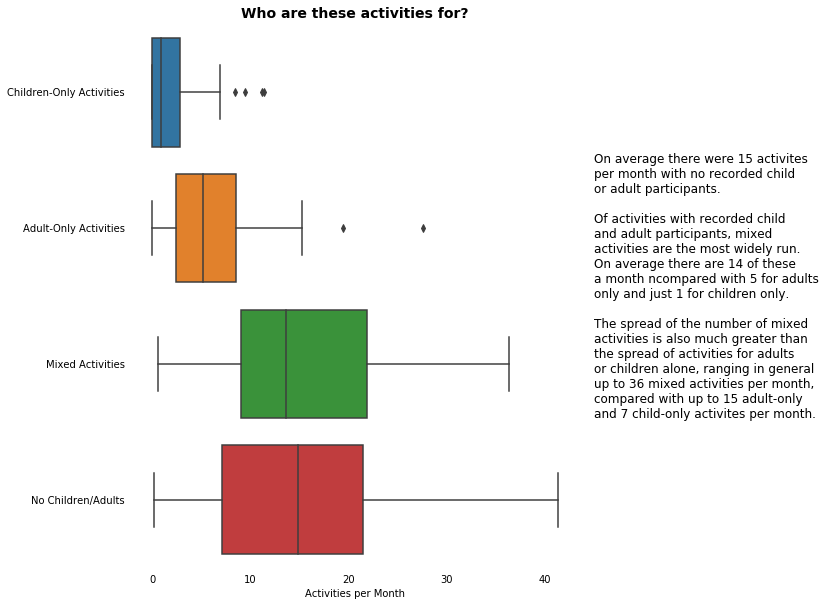

In [799]:
plt.figure(figsize=(8,10))
sns.boxplot(y='activity_audience', x='activities_per_month', data=act_type_per_month)
plt.xlabel('Activity Audience')
plt.ylabel('Activities per Month')

plt.tick_params(bottom=False, top=False, left=False, right=False)

for key, value in plt.gca().spines.items():
    value.set_visible(False)

plt.xlabel('Activities per Month')
plt.ylabel('')


plt.title("Who are these activities for?", fontweight = 'bold', fontsize = '14')


adult_median = observations['adult_only_activities_per_month'].median()
child_median = observations['child_only_activity_per_month'].median()
family_median = observations['familty_activities_per_month'].median()
no_adult_child_median = observations['no_child_adult_activities_per_month'].median()

fam_max = observations['familty_activities_per_month'].sort_values(ascending=False).iloc[0]
child_max = observations['child_only_activity_per_month'].sort_values(ascending=False).iloc[4]
adult_max = observations['adult_only_activities_per_month'].sort_values(ascending=False).iloc[2]


plt.text(45, 2.4, 'On average there were {:.0f} activites\n\
per month with no recorded child\n\
or adult participants.\n\n\
Of activities with recorded child\n\
and adult participants, mixed\n\
activities are the most widely run.\n\
On average there are {:.0f} of these\n\
a month ncompared with {:.0f} for adults\n\
only and just {:.0f} for children only.\n\n\
The spread of the number of mixed\n\
activities is also much greater than\n\
the spread of activities for adults\n\
or children alone, ranging in general\n\
up to {:.0f} mixed activities per month,\n\
compared with up to {:.0f} adult-only\n\
and {:.0f} child-only activites per month.'\
         .format(no_adult_child_median, family_median, adult_median, child_median, fam_max, adult_max, child_max),\
         fontsize = '12')
         
plt.savefig('cha_dfsg_images/4_activities.png',bbox_inches='tight',pad_inches=0)
plt.show()


## 1.4 Participants per Activity

Note, figures are rounded up to the nearest whole.


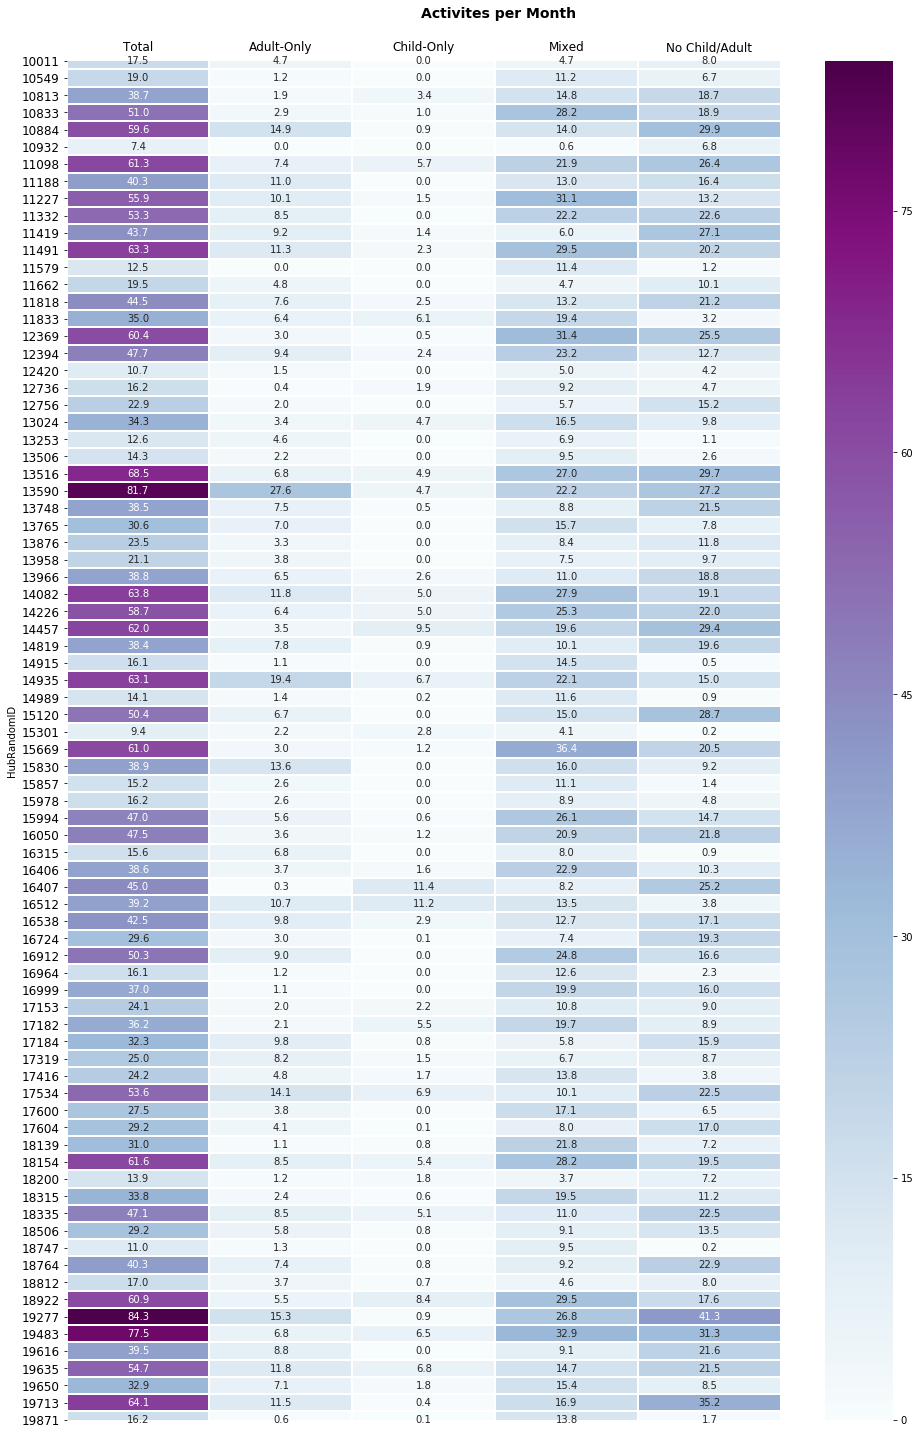

In [829]:
# plot heatmap of values

activity_df = observations[['activities_per_active_month', 'adult_only_activities_per_month',\
                            'child_only_activity_per_month', 'familty_activities_per_month',\
                            'no_child_adult_activities_per_month']]
activity_df.columns = ['Total', 'Adult-Only', 'Child-Only', 'Mixed', 'No Child/Adult']

fig = plt.figure(figsize=(16,25))
sns.heatmap(activity_df, annot=True, fmt='.1f', linewidths=1, cmap='BuPu')
fig.suptitle('Activites per Month', y=.91, fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False,\
                bottom=False, top = False, labeltop=True)

print("Note, figures are rounded up to the nearest whole.")

plt.savefig('cha_dfsg_images/5_activities_heatmap.png',bbox_inches='tight',pad_inches=0)
plt.show()

In [801]:
# new column total participants
df['total_participants'] = df['ChildParticipants'] + df['AdultParticipants']

# group participants by hub
part = df.pivot_table(values=['ChildParticipants', 'AdultParticipants', 'total_participants'],\
                      index = ['HubRandomID'], aggfunc=[sum])
part = part.droplevel(0, axis=1)
part.head()


,AdultParticipants,ChildParticipants,total_participants
HubRandomID,,,
10011,2458,1225,3683
10549,2961,1870,4831
10813,8526,15180,23706
10833,19309,37751,57060
10884,15058,20814,35872


In [802]:
# merge
observations = pd.merge(left=observations, right=part, how='left', on='HubRandomID')
observations.head()

,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count,adult_only_activities_per_month,child_only_activity_per_month,familty_activities_per_month,no_child_adult_activities_per_month,AdultParticipants,ChildParticipants,total_participants
HubRandomID,,,,,,,,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0,4.741935,0.032258,4.709677,8.000000,2458,1225,3683
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714,33.0,0.0,313.0,187.0,1.178571,0.000000,11.178571,6.678571,2961,1870,4831
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0,1.903226,3.387097,14.774194,18.677419,8526,15180,23706
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0,2.931818,1.000000,28.181818,18.909091,19309,37751,57060
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0,14.931818,0.863636,13.954545,29.886364,15058,20814,35872


In [803]:
# participants per activity
observations['part_per_activity'] =  round(observations['total_participants'] / observations['activity_count'])
observations

,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count,adult_only_activities_per_month,child_only_activity_per_month,familty_activities_per_month,no_child_adult_activities_per_month,AdultParticipants,ChildParticipants,total_participants,part_per_activity
HubRandomID,,,,,,,,,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0,4.741935,0.032258,4.709677,8.000000,2458,1225,3683,7.0
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714,33.0,0.0,313.0,187.0,1.178571,0.000000,11.178571,6.678571,2961,1870,4831,9.0
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0,1.903226,3.387097,14.774194,18.677419,8526,15180,23706,20.0
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0,2.931818,1.000000,28.181818,18.909091,19309,37751,57060,25.0
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0,14.931818,0.863636,13.954545,29.886364,15058,20814,35872,14.0
10932,2019-06-28,2019-12-18,5.688918,37,5,7.400000,0.0,0.0,3.0,34.0,0.000000,0.000000,0.600000,6.800000,29,24,53,1.0
11098,2016-01-27,2019-12-09,46.432095,2699,44,61.340909,325.0,250.0,963.0,1161.0,7.386364,5.681818,21.886364,26.386364,18420,38804,57224,21.0
11188,2016-02-01,2019-12-20,46.629398,1774,44,40.318182,482.0,0.0,571.0,721.0,10.954545,0.000000,12.977273,16.386364,28987,5001,33988,19.0
11227,2016-02-01,2019-12-18,46.563630,2458,44,55.863636,445.0,65.0,1369.0,579.0,10.113636,1.477273,31.113636,13.159091,15164,20705,35869,15.0


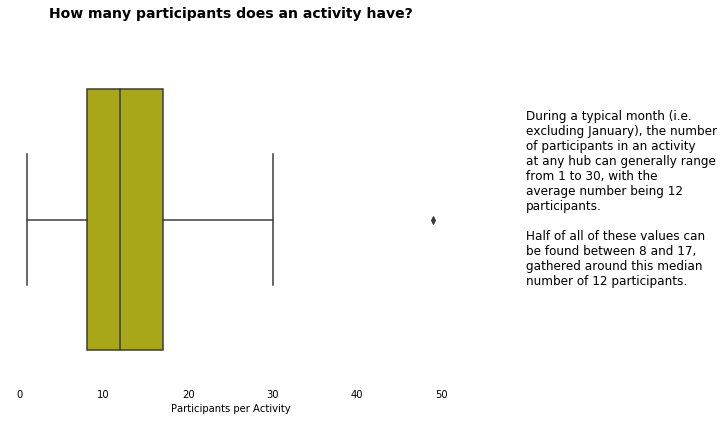

In [804]:
# plot participants per activity
plt.figure(figsize=(8,6))

min_val = observations['part_per_activity'].describe()[3]
q1 = observations['part_per_activity'].describe()[4]
median = observations['part_per_activity'].describe()[5]
q3 = observations['part_per_activity'].describe()[6]
max_val = observations['part_per_activity'].sort_values(ascending=False).iloc[1]

sns.boxplot(observations['part_per_activity'], color = 'y')

plt.tick_params(bottom=False, top=False, left=False, right=False)

for key, value in plt.gca().spines.items():
    value.set_visible(False)

plt.xlabel('Participants per Activity')
plt.title("How many participants does an activity have?", fontweight = 'bold', fontsize = '14', y=1.1)


plt.text(60, .2, 'During a typical month (i.e.\n\
excluding January), the number\n\
of participants in an activity\n\
at any hub can generally range\n\
from {:.0f} to {:.0f}, with the\n\
average number being {:.0f}\n\
participants.\n\n\
Half of all of these values can\n\
be found between {:.0f} and {:.0f},\n\
gathered around this median\n\
number of {:.0f} participants.'.format(min_val, max_val, median, q1, q3, median),  fontsize = '12')

plt.savefig('cha_dfsg_images/6_participants.png',bbox_inches='tight',pad_inches=0)
plt.show()




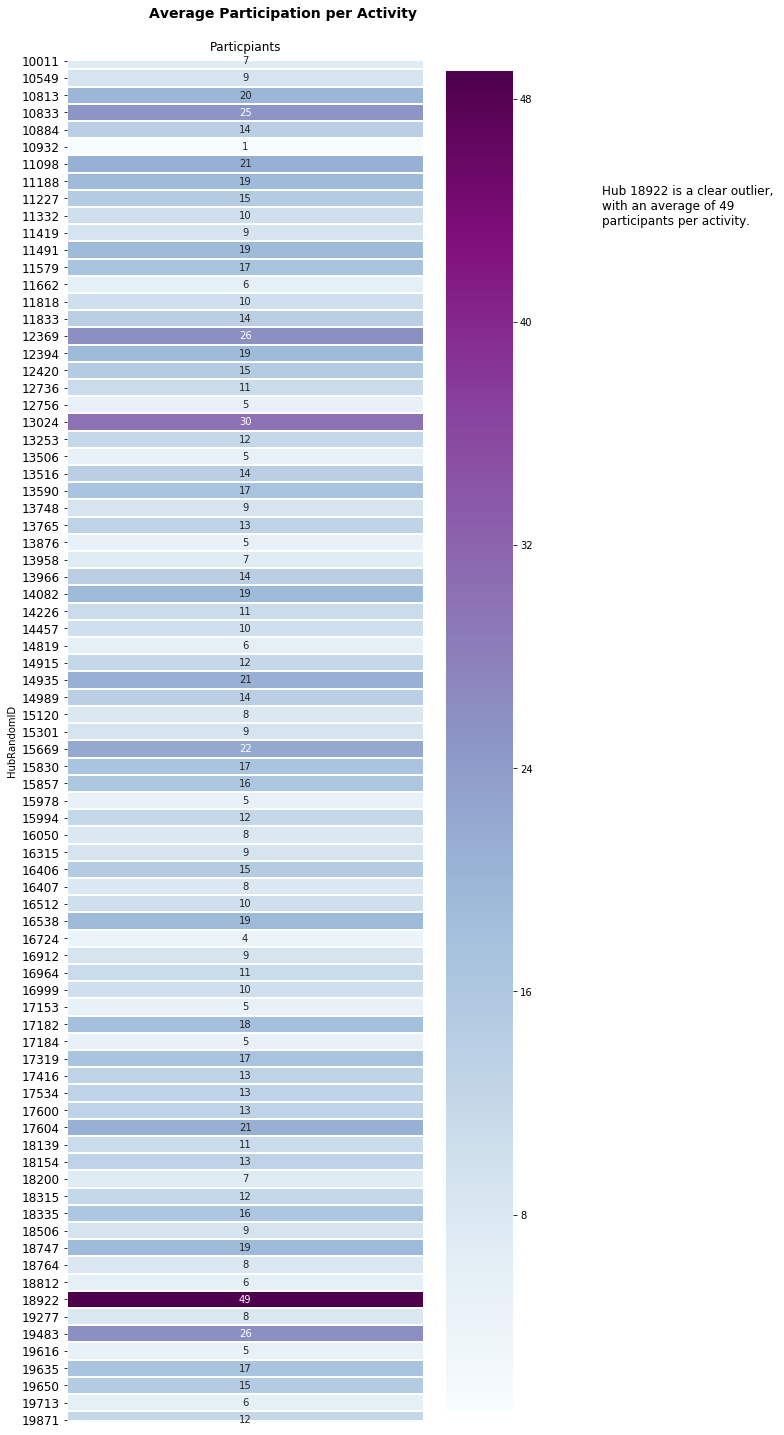

In [805]:
# plot heatmap of values

ppa_df = pd.DataFrame(observations['part_per_activity'])
ppa_df.columns = ['Particpiants']

fig = plt.figure(figsize=(8,25))
sns.heatmap(ppa_df, annot=True, fmt='.0f', linewidths=1, cmap='BuPu')
fig.suptitle('Average Participation per Activity', y=.91, fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False,\
                bottom=False, top = False, labeltop=True)

plt.text(1.5, 10, 'Hub 18922 is a clear outlier, \n\
with an average of 49\n\
participants per activity.',  fontsize = '12')


plt.savefig('cha_dfsg_images/7_part_heatmap.png',bbox_inches='tight',pad_inches=0)

plt.show()

## 1.5 Participants per Month

In [806]:
observations.head()

observations['participants_per_month'] = round(observations['total_participants'] / observations['active_month_count'])
observations['adult_participants_per_month'] = round(observations['AdultParticipants'] / observations['active_month_count'])
observations['child_participants_per_month'] = round(observations['ChildParticipants'] / observations['active_month_count'])
observations.head()


,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count,adult_only_activities_per_month,child_only_activity_per_month,familty_activities_per_month,no_child_adult_activities_per_month,AdultParticipants,ChildParticipants,total_participants,part_per_activity,participants_per_month,adult_participants_per_month,child_participants_per_month
HubRandomID,,,,,,,,,,,,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0,4.741935,0.032258,4.709677,8.000000,2458,1225,3683,7.0,119.0,79.0,40.0
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714,33.0,0.0,313.0,187.0,1.178571,0.000000,11.178571,6.678571,2961,1870,4831,9.0,173.0,106.0,67.0
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0,1.903226,3.387097,14.774194,18.677419,8526,15180,23706,20.0,765.0,275.0,490.0
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0,2.931818,1.000000,28.181818,18.909091,19309,37751,57060,25.0,1297.0,439.0,858.0
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0,14.931818,0.863636,13.954545,29.886364,15058,20814,35872,14.0,815.0,342.0,473.0


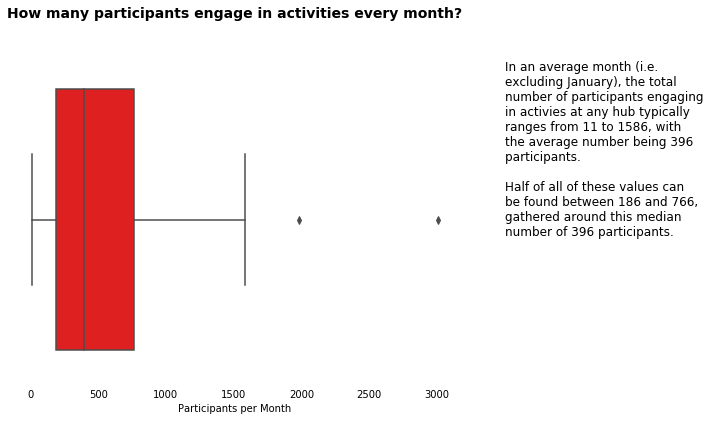

In [828]:
# plot throughput of participants per month
plt.figure(figsize=(8,6))

min_val = observations['participants_per_month'].describe()[3]
q1 = observations['participants_per_month'].describe()[4]
median = observations['participants_per_month'].describe()[5]
q3 = observations['participants_per_month'].describe()[6]
max_val = observations['participants_per_month'].sort_values(ascending=False).iloc[2]

sns.boxplot(observations['participants_per_month'], color ='r')

plt.tick_params(bottom=False, top=False, left=False, right=False)

for key, value in plt.gca().spines.items():
    value.set_visible(False)

plt.xlabel('Participants per Month')
plt.title("How many participants engage in activities every month?", fontweight = 'bold', fontsize = '14', y=1.1)


plt.text(3500, 0.05, 'In an average month (i.e.\n\
excluding January), the total\n\
number of participants engaging\n\
in activies at any hub typically\n\
ranges from {:.0f} to {:.0f}, with\n\
the average number being {:.0f}\n\
participants. \n\n\
Half of all of these values can\n\
be found between {:.0f} and {:.0f},\n\
gathered around this median\n\
number of {:.0f} participants.'.format(min_val, max_val, median, q1, q3, median),  fontsize = '12')

plt.savefig('cha_dfsg_images/8_part.png',bbox_inches='tight',pad_inches=0)
plt.show()


In [808]:
part_type_per_month =  observations[['adult_participants_per_month', 
                                     'child_participants_per_month']].stack().reset_index()
part_type_per_month
part_type_per_month.columns = ['HubRandomID', 'Participant', 'participants_per_month']
part_type_per_month['Participant'] = part_type_per_month['Participant'].str.replace('child_participants_per_month', 'Children')
part_type_per_month['Participant'] = part_type_per_month['Participant'].str.replace('adult_participants_per_month', 'Adults')
part_type_per_month.head()

,HubRandomID,Participant,participants_per_month
0,10011,Adults,79.0
1,10011,Children,40.0
2,10549,Adults,106.0
3,10549,Children,67.0
4,10813,Adults,275.0


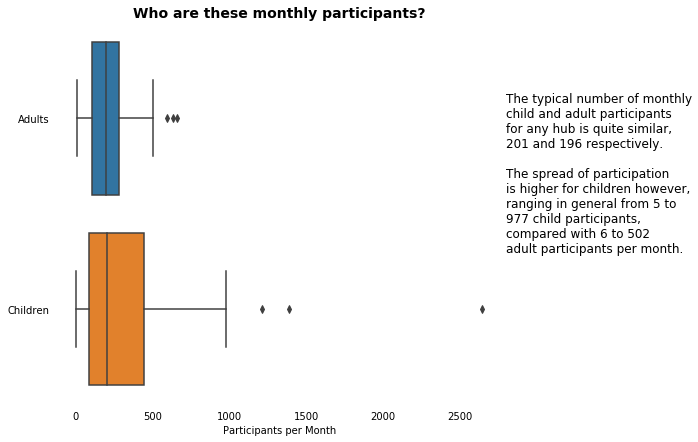

In [809]:
plt.figure(figsize=(8,7))
sns.boxplot(y='Participant', x='participants_per_month', data=part_type_per_month)

plt.tick_params(bottom=False, top=False, left=False, right=False)

for key, value in plt.gca().spines.items():
    value.set_visible(False)

plt.xlabel('Participants per Month')
plt.ylabel('')

plt.title("Who are these monthly participants?", fontweight = 'bold', fontsize = '14')

child_median = observations['child_participants_per_month'].median()
adult_median = observations['adult_participants_per_month'].median()
child_max = observations['child_participants_per_month'].sort_values(ascending=False).iloc[3]
adult_max = observations['adult_participants_per_month'].sort_values(ascending=False).iloc[3]

plt.text(2800, .7, 'The typical number of monthly\n\
child and adult participants\n\
for any hub is quite similar,\n\
{:.0f} and {:.0f} respectively. \n\n\
The spread of participation\n\
is higher for children however,\n\
ranging in general from 5 to\n\
{:.0f} child participants,\n\
compared with 6 to {:.0f}\n\
adult participants per month.'.format(child_median, adult_median,
                                                               child_max, adult_max),  fontsize = '12')
plt.savefig('cha_dfsg_images/9_part.png',bbox_inches='tight',pad_inches=0)         
plt.show()


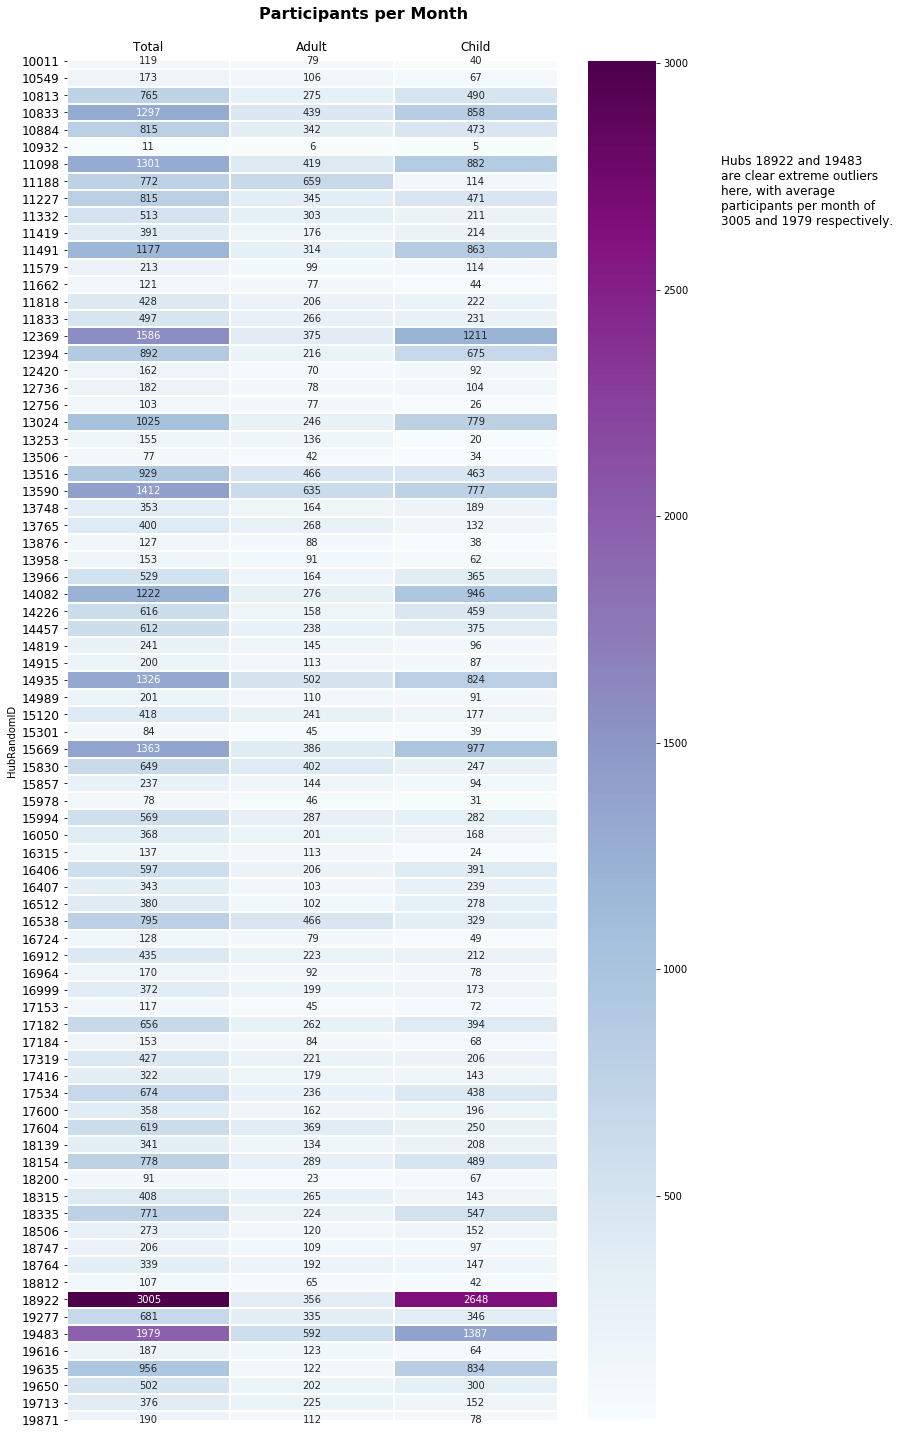

In [810]:
part_df = observations[['participants_per_month', 'adult_participants_per_month', 'child_participants_per_month']]
part_df.columns = ['Total', 'Adult', 'Child']

fig = plt.figure(figsize=(11,25))
sns.heatmap(part_df, annot=True, fmt='.0f', linewidths=1, cmap='BuPu')
fig.suptitle('Participants per Month', y=.91, fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False,\
                bottom=False, top = False, labeltop=True)

plt.text(4, 10, "Hubs 18922 and 19483\n\
are clear extreme outliers\n\
here, with average\n\
participants per month of\n\
3005 and 1979 respectively.", fontsize='12')

plt.savefig('cha_dfsg_images/10_part_heatmap.png',bbox_inches='tight',pad_inches=0)
plt.show()

In [811]:
observations['child_participants_per_month'].sort_values(ascending=False)[3:4]

HubRandomID
15669    977.0
Name: child_participants_per_month, dtype: float64

In [812]:
observations['child_participants_per_month'].describe()

count      80.000000
mean      330.000000
std       400.518335
min         5.000000
25%        84.750000
50%       201.000000
75%       443.250000
max      2648.000000
Name: child_participants_per_month, dtype: float64

# 2. Manual Clustering
## 2.1 Engagement
Metric = throughput of total participants per month 

In [813]:
# categorise as above or below average engagement

engagement_threshold = observations['participants_per_month'].median()
observations['engaged'] = observations['participants_per_month'].apply(lambda x: \
                                                    'Above Average' if x >= engagement_threshold\
                                                    else 'Below Average')
observations.head()

,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count,adult_only_activities_per_month,child_only_activity_per_month,familty_activities_per_month,no_child_adult_activities_per_month,AdultParticipants,ChildParticipants,total_participants,part_per_activity,participants_per_month,adult_participants_per_month,child_participants_per_month,engaged
HubRandomID,,,,,,,,,,,,,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0,4.741935,0.032258,4.709677,8.000000,2458,1225,3683,7.0,119.0,79.0,40.0,Below Average
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714,33.0,0.0,313.0,187.0,1.178571,0.000000,11.178571,6.678571,2961,1870,4831,9.0,173.0,106.0,67.0,Below Average
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0,1.903226,3.387097,14.774194,18.677419,8526,15180,23706,20.0,765.0,275.0,490.0,Above Average
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0,2.931818,1.000000,28.181818,18.909091,19309,37751,57060,25.0,1297.0,439.0,858.0,Above Average
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0,14.931818,0.863636,13.954545,29.886364,15058,20814,35872,14.0,815.0,342.0,473.0,Above Average


## 2.2 Diversity of Programs

How diverse are the programs offered by hubs?

Metric = Simpson's or Shannon's Index  

"Generalizing from Ecology, we say that a population sample is diverse with respect to a specific attribute if it
exhibits a rich variety of values of that attribute and if each of those values is evenly abundant. In other words, high diversity corresponds to a uniform distribution of objects across all possible values of an attribute."
https://web.engr.oregonstate.edu/~zhange/images/diversity_infovis10.pdf  

http://www.countrysideinfo.co.uk/simpsons.htm  

https://www.statisticshowto.datasciencecentral.com/simpsons-diversity-index/  

https://en.wikipedia.org/wiki/Diversity_index#Simpson_index  

Gini-Simpson Index


In [814]:
diversity = df.pivot_table(values='Hub_ActivityID', index=['HubRandomID', 'ProgrammeName'], aggfunc=[len])
diversity = diversity.droplevel(0, axis=1).reset_index()
diversity.columns = ['HubRandomID', 'ProgrammeName', 'programme_count']
diversity.head(7)

,HubRandomID,ProgrammeName,programme_count
0,10011,English Classes & Conversation Programs,8
1,10011,Formal Training,54
2,10011,Healthy Lifestyle programs,11
3,10011,Informal Training,33
4,10011,Parent engagement,289
5,10011,Playgroups and Early Years,147
6,10549,English Classes & Conversation Programs,182


In [815]:
diversity['n(n-1)'] = diversity['programme_count'].apply(lambda x: x*(x-1))
diversity.head(7)

,HubRandomID,ProgrammeName,programme_count,n(n-1)
0,10011,English Classes & Conversation Programs,8,56
1,10011,Formal Training,54,2862
2,10011,Healthy Lifestyle programs,11,110
3,10011,Informal Training,33,1056
4,10011,Parent engagement,289,83232
5,10011,Playgroups and Early Years,147,21462
6,10549,English Classes & Conversation Programs,182,32942


In [816]:
diversity = diversity.pivot_table(values=['programme_count', 'n(n-1)'], index='HubRandomID',
                      aggfunc=[sum]).droplevel(0, axis=1)

diversity.columns = ['sigma_n*n-1', 'sum_progs']
diversity['N(N-1)'] = diversity['sum_progs']*(diversity['sum_progs']-1)
diversity['D'] = diversity['sigma_n*n-1']/diversity['N(N-1)']
diversity['simpsons_index_diversity'] = 1-diversity['D'] 
diversity


,sigma_n*n-1,sum_progs,N(N-1),D,simpsons_index_diversity
HubRandomID,,,,,
10011,108778,542,293222,0.370975,0.629025
10549,90396,533,283556,0.318794,0.681206
10813,339984,1201,1441200,0.235903,0.764097
10833,1238174,2245,5037780,0.245778,0.754222
10884,1137074,2624,6882752,0.165206,0.834794
10932,420,37,1332,0.315315,0.684685
11098,1174004,2699,7281902,0.161222,0.838778
11188,550368,1774,3145302,0.174981,0.825019
11227,1050826,2458,6039306,0.173998,0.826002


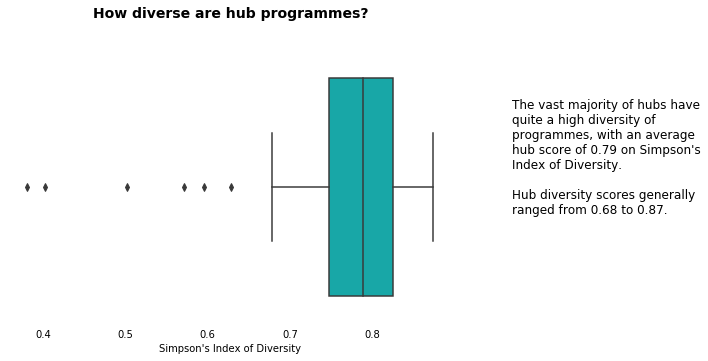

In [817]:
# plot diversity

plt.figure(figsize=(8,5))
sns.boxplot(diversity['simpsons_index_diversity'], color = 'c')

diversity_max = diversity['simpsons_index_diversity'].max()
median = diversity['simpsons_index_diversity'].median()
diversity_min = diversity['simpsons_index_diversity'].sort_values().iloc[6]

plt.tick_params(bottom=False, top=False, left=False, right=False)

for key, value in plt.gca().spines.items():
    value.set_visible(False)

plt.xlabel("Simpson's Index of Diversity")
plt.title("How diverse are hub programmes?", fontweight = 'bold', fontsize = '14', y=1.1)


plt.text(.97, 0.1, "The vast majority of hubs have\n\
quite a high diversity of\n\
programmes, with an average\n\
hub score of {:.2f} on Simpson's\n\
Index of Diversity.\n\n\
Hub diversity scores generally\n\
ranged from {:.2f} to {:.2f}.".format(median, diversity_min, diversity_max),  fontsize = '12')

plt.savefig('cha_dfsg_images/11_diversity.png',bbox_inches='tight',pad_inches=0)
plt.show()

In [818]:
# merge into our dataset

diversity_index = diversity['simpsons_index_diversity']

observations = pd.merge(left=observations, right=diversity_index, how='left', on='HubRandomID')
observations.head()

,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count,adult_only_activities_per_month,child_only_activity_per_month,familty_activities_per_month,no_child_adult_activities_per_month,AdultParticipants,ChildParticipants,total_participants,part_per_activity,participants_per_month,adult_participants_per_month,child_participants_per_month,engaged,simpsons_index_diversity
HubRandomID,,,,,,,,,,,,,,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0,4.741935,0.032258,4.709677,8.000000,2458,1225,3683,7.0,119.0,79.0,40.0,Below Average,0.629025
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714,33.0,0.0,313.0,187.0,1.178571,0.000000,11.178571,6.678571,2961,1870,4831,9.0,173.0,106.0,67.0,Below Average,0.681206
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0,1.903226,3.387097,14.774194,18.677419,8526,15180,23706,20.0,765.0,275.0,490.0,Above Average,0.764097
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0,2.931818,1.000000,28.181818,18.909091,19309,37751,57060,25.0,1297.0,439.0,858.0,Above Average,0.754222
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0,14.931818,0.863636,13.954545,29.886364,15058,20814,35872,14.0,815.0,342.0,473.0,Above Average,0.834794


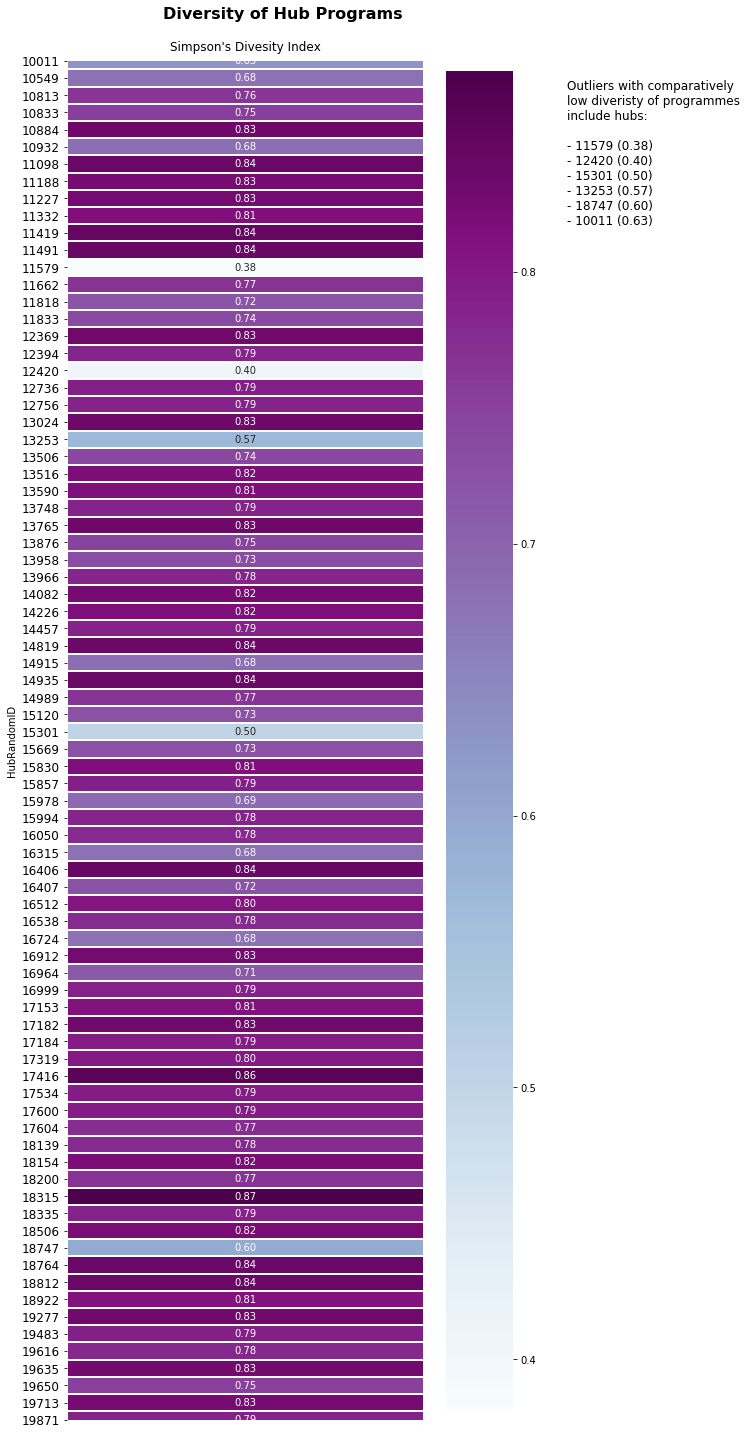

In [819]:
diversity_df = pd.DataFrame(observations['simpsons_index_diversity'])
diversity_df.columns = ["Simpson's Divesity Index"]

fig = plt.figure(figsize=(8,25))
sns.heatmap(diversity_df, annot=True, fmt='.2f', linewidths=1, cmap='BuPu')
fig.suptitle('Diversity of Hub Programs', y=.91, fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False,\
                bottom=False, top = False, labeltop=True)

plt.text(1.4, 10, "Outliers with comparatively\n\
low diveristy of programmes\n\
include hubs:\n\n\
- 11579 (0.38)\n\
- 12420 (0.40)\n\
- 15301 (0.50)\n\
- 13253 (0.57)\n\
- 18747 (0.60)\n\
- 10011 (0.63)", fontsize='12')

plt.savefig('cha_dfsg_images/12_diversity_heatmap.png',bbox_inches='tight',pad_inches=0)
plt.show()

## 2.3 'Spread' of activities for children and adults

Let's look at  
1. ratio of adult-only activities to child-only activities
2. activities available to adults and children include _family activities_

Taking an example:
Hub 10833 has  
- 129 adult-only activities
- 44 child-only activities
- 1240 activities available to both adults and children (family activities)

This means that adults could have participated in 1369 activities, and children in 1284 activities.

1. Ratio of adult-only activities to child-only activities

In [820]:
# clean before getting ratio

# hubs with 0 child-only activites
no_child_acts = observations[(observations['child_only_activity_count'] == 0) & \
                                   (observations['adult_only_activity_count'] > 0)]

no_child_acts_count = observations[(observations['child_only_activity_count'] == 0) & \
                                   (observations['adult_only_activity_count'] > 0)].shape[0]

# hubs with 0 child-only and 0 adult-only activites
no_child_adult_acts = observations[(observations['child_only_activity_count'] == 0) & \
                                   (observations['adult_only_activity_count'] == 0)]

no_child_adult_acts_count = observations[(observations['child_only_activity_count'] == 0) & \
                                   (observations['adult_only_activity_count'] == 0)].shape[0]

print("These need to be left out:")
print("{} hubs with 0 child-only activities.".format(no_child_acts_count))
print("{} hubs had 0 child-only and 0 adult-only activities.".format(no_child_adult_acts_count))

leave_out = no_child_acts.index.append(no_child_adult_acts.index)

## dataset to use to get adult-child ratio
print(observations[~observations.index.isin(leave_out)].shape)

ratio = observations[~observations.index.isin(leave_out)].copy()
ratio

These need to be left out:
20 hubs with 0 child-only activities.
2 hubs had 0 child-only and 0 adult-only activities.
(58, 23)


,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count,adult_only_activities_per_month,child_only_activity_per_month,familty_activities_per_month,no_child_adult_activities_per_month,AdultParticipants,ChildParticipants,total_participants,part_per_activity,participants_per_month,adult_participants_per_month,child_participants_per_month,engaged,simpsons_index_diversity
HubRandomID,,,,,,,,,,,,,,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0,4.741935,0.032258,4.709677,8.000000,2458,1225,3683,7.0,119.0,79.0,40.0,Below Average,0.629025
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0,1.903226,3.387097,14.774194,18.677419,8526,15180,23706,20.0,765.0,275.0,490.0,Above Average,0.764097
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0,2.931818,1.000000,28.181818,18.909091,19309,37751,57060,25.0,1297.0,439.0,858.0,Above Average,0.754222
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0,14.931818,0.863636,13.954545,29.886364,15058,20814,35872,14.0,815.0,342.0,473.0,Above Average,0.834794
11098,2016-01-27,2019-12-09,46.432095,2699,44,61.340909,325.0,250.0,963.0,1161.0,7.386364,5.681818,21.886364,26.386364,18420,38804,57224,21.0,1301.0,419.0,882.0,Above Average,0.838778
11227,2016-02-01,2019-12-18,46.563630,2458,44,55.863636,445.0,65.0,1369.0,579.0,10.113636,1.477273,31.113636,13.159091,15164,20705,35869,15.0,815.0,345.0,471.0,Above Average,0.826002
11419,2016-02-01,2019-12-12,46.366327,1923,44,43.704545,404.0,62.0,266.0,1191.0,9.181818,1.409091,6.045455,27.068182,7765,9436,17201,9.0,391.0,176.0,214.0,Below Average,0.844217
11491,2016-02-01,2019-12-20,46.629398,2784,44,63.272727,498.0,100.0,1297.0,889.0,11.318182,2.272727,29.477273,20.204545,13815,37987,51802,19.0,1177.0,314.0,863.0,Above Average,0.841845
11662,2017-01-23,2019-12-13,34.659651,644,33,19.515152,157.0,1.0,154.0,332.0,4.757576,0.030303,4.666667,10.060606,2538,1455,3993,6.0,121.0,77.0,44.0,Below Average,0.767414


In [821]:
ratio['adult_child_only_activity_ratio'] = ratio['adult_only_activity_count'] / ratio['child_only_activity_count']
ratio.shape

(58, 24)

In [822]:
observations = pd.merge(left=observations, right=ratio['adult_child_only_activity_ratio'], how='left', on='HubRandomID')
observations.head()


,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count,adult_only_activities_per_month,child_only_activity_per_month,familty_activities_per_month,no_child_adult_activities_per_month,AdultParticipants,ChildParticipants,total_participants,part_per_activity,participants_per_month,adult_participants_per_month,child_participants_per_month,engaged,simpsons_index_diversity,adult_child_only_activity_ratio
HubRandomID,,,,,,,,,,,,,,,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0,4.741935,0.032258,4.709677,8.000000,2458,1225,3683,7.0,119.0,79.0,40.0,Below Average,0.629025,147.000000
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714,33.0,0.0,313.0,187.0,1.178571,0.000000,11.178571,6.678571,2961,1870,4831,9.0,173.0,106.0,67.0,Below Average,0.681206,NaN
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0,1.903226,3.387097,14.774194,18.677419,8526,15180,23706,20.0,765.0,275.0,490.0,Above Average,0.764097,0.561905
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0,2.931818,1.000000,28.181818,18.909091,19309,37751,57060,25.0,1297.0,439.0,858.0,Above Average,0.754222,2.931818
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0,14.931818,0.863636,13.954545,29.886364,15058,20814,35872,14.0,815.0,342.0,473.0,Above Average,0.834794,17.289474


If we are considering only adult-only and child-only activities (i.e. not those that where both adults and children attend) then it is worth noting that there are: 
- 20 hubs with 0 child-only activities 
- 2 hubs with 0 child-only and 0 adult-only activities
 
In general there are between 0.02 and 17.29 adult-only activities for every child-only activity. The typical ratio is approximately 3:1. There are also some quite extreme outliers here, with the most extreme giving a ratio of 157:1.


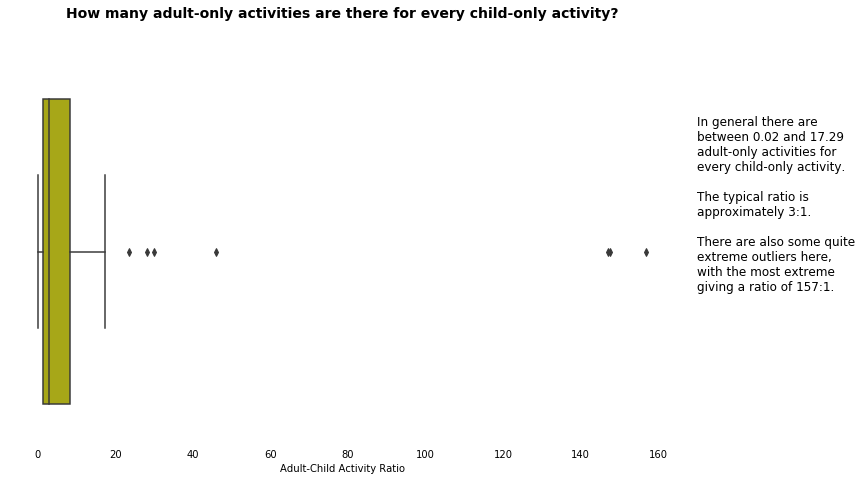

In [823]:
# plot for just adult-only vs child-only
plt.figure(figsize=(12, 7))
sns.boxplot(ratio['adult_child_only_activity_ratio'], color='y');

general_max = ratio['adult_child_only_activity_ratio'].sort_values(ascending=False).iloc[7]
median = ratio['adult_child_only_activity_ratio'].median()
ratio_min = ratio['adult_child_only_activity_ratio'].min()
ratio_max = ratio['adult_child_only_activity_ratio'].max()

plt.tick_params(bottom=False, top=False, left=False, right=False)

for key, value in plt.gca().spines.items():
    value.set_visible(False)

plt.xlabel("Adult-Child Activity Ratio")
plt.title("How many adult-only activities are there for every child-only activity?", fontweight = 'bold', fontsize = '14', y=1.1)

print("If we are considering only adult-only and child-only activities (i.e. not those that \
where both adults and children attend) then it is worth noting that there are: \n\
- {} hubs with 0 child-only activities \n\
- {} hubs with 0 child-only and 0 adult-only activities".format(no_child_acts_count, no_child_adult_acts_count))
print(" ")
print("In general there are between {:.2f} and {:.2f} adult-only activities for \
every child-only activity. The typical ratio is approximately {:.0f}:1. There are also some \
quite extreme outliers here, with the most extreme giving a ratio of {:.0f}:1."\
      .format(ratio_min, general_max, median, ratio_max))

plt.text(170, 0.1, "In general there are\n\
between {:.2f} and {:.2f}\n\
adult-only activities for\n\
every child-only activity.\n\n\
The typical ratio is\n\
approximately {:.0f}:1.\n\n\
There are also some quite\n\
extreme outliers here,\n\
with the most extreme\n\
giving a ratio of {:.0f}:1."\
      .format(ratio_min, general_max, median, ratio_max), fontsize='12')

plt.savefig('cha_dfsg_images/13_ratio.png',bbox_inches='tight',pad_inches=0)
plt.show()


In [824]:
# observations[['child_only_activity_count', 'adult_only_activity_count', 'child_adult_activity_ratio', 'adult_child_activity_ratio']]
observations['adult_activity_incl_family'] = observations['adult_only_activity_count'] + observations['family_activity_count']
observations['child_activity_incl_family'] = observations['child_only_activity_count'] + observations['family_activity_count']
observations['adult_child_activity_ratio_incl_family'] = observations['adult_activity_incl_family'] / observations['child_activity_incl_family']
observations.head()

,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count,adult_only_activities_per_month,child_only_activity_per_month,familty_activities_per_month,no_child_adult_activities_per_month,AdultParticipants,ChildParticipants,total_participants,part_per_activity,participants_per_month,adult_participants_per_month,child_participants_per_month,engaged,simpsons_index_diversity,adult_child_only_activity_ratio,adult_activity_incl_family,child_activity_incl_family,adult_child_activity_ratio_incl_family
HubRandomID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0,4.741935,0.032258,4.709677,8.000000,2458,1225,3683,7.0,119.0,79.0,40.0,Below Average,0.629025,147.000000,293.0,147.0,1.993197
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714,33.0,0.0,313.0,187.0,1.178571,0.000000,11.178571,6.678571,2961,1870,4831,9.0,173.0,106.0,67.0,Below Average,0.681206,NaN,346.0,313.0,1.105431
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0,1.903226,3.387097,14.774194,18.677419,8526,15180,23706,20.0,765.0,275.0,490.0,Above Average,0.764097,0.561905,517.0,563.0,0.918295
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0,2.931818,1.000000,28.181818,18.909091,19309,37751,57060,25.0,1297.0,439.0,858.0,Above Average,0.754222,2.931818,1369.0,1284.0,1.066199
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0,14.931818,0.863636,13.954545,29.886364,15058,20814,35872,14.0,815.0,342.0,473.0,Above Average,0.834794,17.289474,1271.0,652.0,1.949387


If we are considering only adult-only
and child-only activities
(i.e. not those  where both adults
and children attend) then it is
worth noting that there are: 
- 20 hubs with 0 child-only activities 
- 2 hubs with 0 child-only and
0 adult-only activities
 


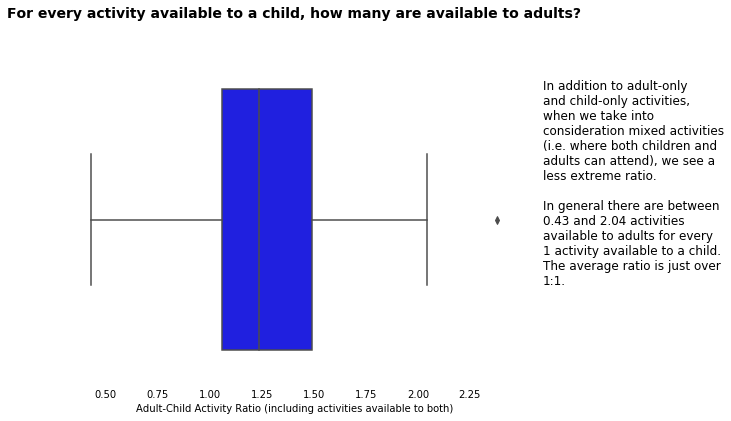

In [825]:
plt.figure(figsize=(8,6))

sns.boxplot(observations['adult_child_activity_ratio_incl_family'], color='b')

general_max = observations['adult_child_activity_ratio_incl_family'].sort_values(ascending=False).iloc[1]
median = observations['adult_child_activity_ratio_incl_family'].median()
ratio_min = observations['adult_child_activity_ratio_incl_family'].min()
ratio_max = observations['adult_child_activity_ratio_incl_family'].max()

plt.tick_params(bottom=False, top=False, left=False, right=False)

for key, value in plt.gca().spines.items():
    value.set_visible(False)

plt.xlabel("Adult-Child Activity Ratio (including activities available to both)")
plt.title("For every activity available to a child, how many are available to adults?", fontweight = 'bold', fontsize = '14', y=1.1)

print("If we are considering only adult-only\n\
and child-only activities\n\
(i.e. not those  where both adults\n\
and children attend) then it is\n\
worth noting that there are: \n\
- {} hubs with 0 child-only activities \n\
- {} hubs with 0 child-only and\n\
0 adult-only activities".format(no_child_acts_count, no_child_adult_acts_count))
print(" ")

plt.text(2.6, 0.2, "In addition to adult-only\n\
and child-only activities,\n\
when we take into\n\
consideration mixed activities\n\
(i.e. where both children and\n\
adults can attend), we see a\n\
less extreme ratio.\n\n\
In general there are between\n\
{:.2f} and {:.2f} activities\n\
available to adults for every \n\
1 activity available to a child.\n\
The average ratio is just over\n\
{:.0f}:1."\
      .format(ratio_min, general_max, median, ratio_max),  fontsize = '12')

plt.savefig('cha_dfsg_images/14_ratio.png',bbox_inches='tight',pad_inches=0)
plt.show()


In [826]:
observations.head()

,min_date,max_date,months_running,activity_count,active_month_count,activities_per_active_month,adult_only_activity_count,child_only_activity_count,family_activity_count,no_child_adult_attendees_count,adult_only_activities_per_month,child_only_activity_per_month,familty_activities_per_month,no_child_adult_activities_per_month,AdultParticipants,ChildParticipants,total_participants,part_per_activity,participants_per_month,adult_participants_per_month,child_participants_per_month,engaged,simpsons_index_diversity,adult_child_only_activity_ratio,adult_activity_incl_family,child_activity_incl_family,adult_child_activity_ratio_incl_family
HubRandomID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10011,2017-04-17,2019-12-09,31.765866,542,31,17.483871,147.0,1.0,146.0,248.0,4.741935,0.032258,4.709677,8.000000,2458,1225,3683,7.0,119.0,79.0,40.0,Below Average,0.629025,147.000000,293.0,147.0,1.993197
10549,2017-07-10,2019-12-20,29.365340,533,28,19.035714,33.0,0.0,313.0,187.0,1.178571,0.000000,11.178571,6.678571,2961,1870,4831,9.0,173.0,106.0,67.0,Below Average,0.681206,NaN,346.0,313.0,1.105431
10813,2017-04-17,2019-12-17,32.028938,1201,31,38.741935,59.0,105.0,458.0,579.0,1.903226,3.387097,14.774194,18.677419,8526,15180,23706,20.0,765.0,275.0,490.0,Above Average,0.764097,0.561905,517.0,563.0,0.918295
10833,2016-01-27,2019-12-19,46.760934,2245,44,51.022727,129.0,44.0,1240.0,832.0,2.931818,1.000000,28.181818,18.909091,19309,37751,57060,25.0,1297.0,439.0,858.0,Above Average,0.754222,2.931818,1369.0,1284.0,1.066199
10884,2016-02-01,2019-12-04,46.103256,2624,44,59.636364,657.0,38.0,614.0,1315.0,14.931818,0.863636,13.954545,29.886364,15058,20814,35872,14.0,815.0,342.0,473.0,Above Average,0.834794,17.289474,1271.0,652.0,1.949387


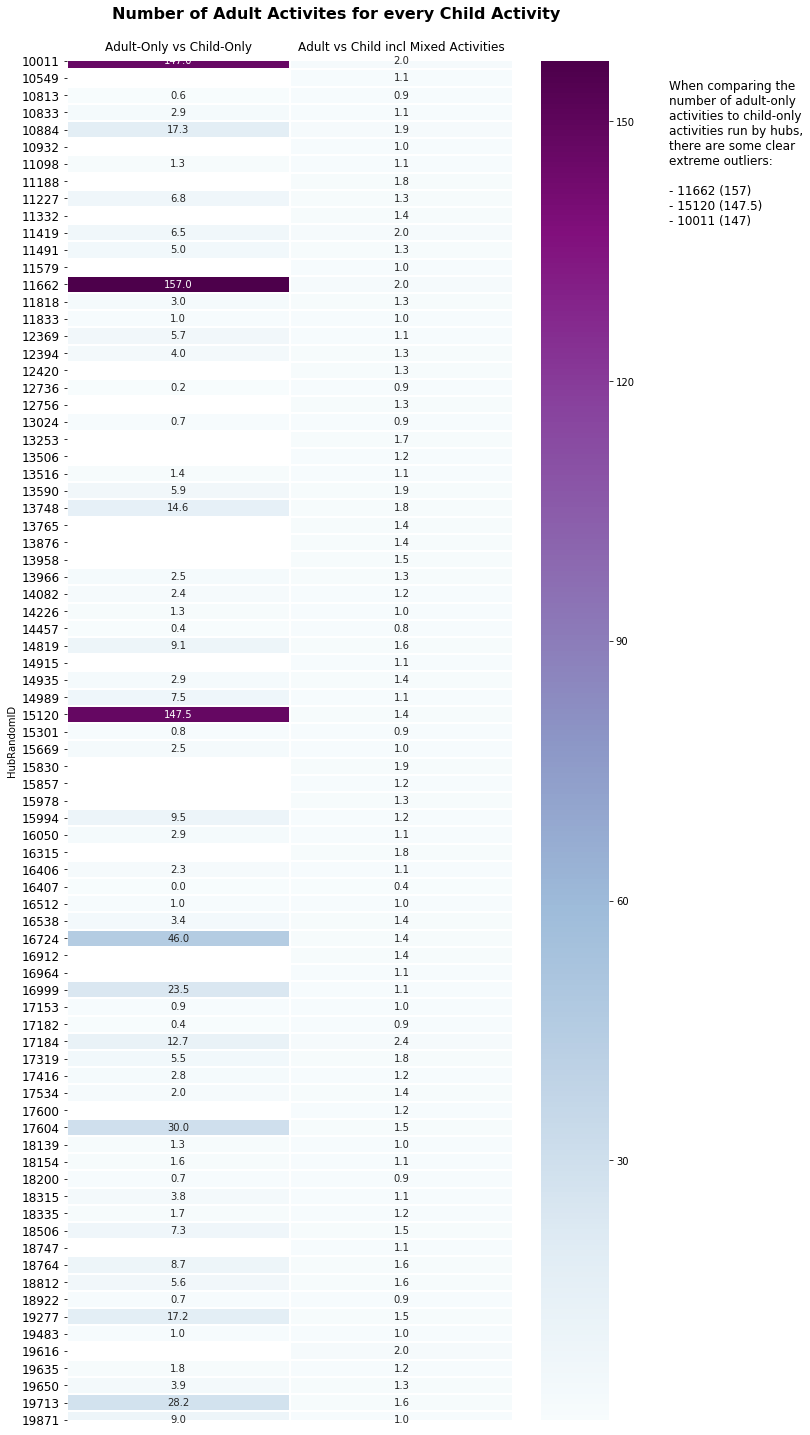

In [827]:
ratio_df = observations[['adult_child_only_activity_ratio', 'adult_child_activity_ratio_incl_family']]
ratio_df.columns = ['Adult-Only vs Child-Only', 'Adult vs Child incl Mixed Activities']

fig = plt.figure(figsize=(10,25))
sns.heatmap(ratio_df, annot=True, fmt='.1f', linewidths=1, cmap='BuPu')
fig.suptitle('Number of Adult Activites for every Child Activity', y=.91, fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False,\
                bottom=False, top = False, labeltop=True)

plt.text(2.7, 10, "When comparing the\n\
number of adult-only\n\
activities to child-only\n\
activities run by hubs,\n\
there are some clear\n\
extreme outliers:\n\n\
- 11662 (157)\n\
- 15120 (147.5)\n\
- 10011 (147)", fontsize='12')

plt.savefig('cha_dfsg_images/15_ratio_heatmap.png',bbox_inches='tight',pad_inches=0)
plt.show()